Author: Muhammad Sholih Fajri

## Import Modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier

## Functions needed

In [2]:
def load_data(filepath):
    
    return pd.read_csv(filepath)

In [3]:
def scaler_transform(X, scaler = None):
    """
    Fungsi untuk melakukan standardisasi
    :param X: <pandas DataFrame> sampel data
    :param scaler: <sklearn object> scaler, default None
    :return X_scaled: <pandas Dataframe> sampel data OHE
    :param scaler: <sklearn object> scaler, default None
    """
    if scaler != None:
        pass
    else:
        # Buat & fit encoder
        scaler = StandardScaler()
        scaler.fit(X)

    # Tranform data
    X_scaled = scaler.transform(X)
    X_scaled = pd.DataFrame(X_scaled,
                            columns = X.columns,
                            index = X.index)
    
    return X_scaled, scaler


In [4]:
def prepare_test(X, scaler):  
    # Scaled data
    X_clean, _ = scaler_transform(X = X,
                                  scaler = scaler)
    
    return X_clean

In [5]:
#Fungsi untuk menampilkan confusion matrix
 
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
 
    print(cm)
 
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
 
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
 
    plt.tight_layout()
    plt.ylabel('True Label', size=12)
    plt.xlabel('Predicted Label', size=12)

## Training-Validation and Test Dataset

In [6]:
train_data = load_data('./Dataset Gamma/all_train_data_combined.csv')
test_data = load_data('./Dataset Gamma/test_data.csv')

In [9]:
train_data.head()

,E1,E2,E3,E4,E5,E6,E7,E8,E9,E10,...,E248,E249,E250,E251,E252,E253,E254,E255,E256,Class
0,0.0,1.0,34.0,45.0,62.0,57.0,72.0,62.0,95.0,135.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.0,Co
1,0.0,1.0,31.0,46.0,52.0,54.0,57.0,73.0,108.0,120.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21.0,Co
2,0.0,0.0,26.0,54.0,50.0,63.0,62.0,77.0,94.0,133.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.0,Co
3,0.0,1.0,33.0,40.0,54.0,54.0,53.0,63.0,94.0,128.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,20.0,Co
4,0.0,1.0,28.0,46.0,50.0,61.0,60.0,56.0,104.0,119.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16.0,Co


In [10]:
test_data.head()

,E1,E2,E3,E4,E5,E6,E7,E8,E9,E10,...,E248,E249,E250,E251,E252,E253,E254,E255,E256,Class
0,0.0,0.0,18.0,32.0,50.0,37.0,44.0,52.0,85.0,89.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,Co
1,0.0,0.0,19.0,46.0,39.0,50.0,56.0,51.0,74.0,74.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,Co
2,0.0,1.0,21.0,37.0,29.0,57.0,49.0,44.0,80.0,86.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19.0,Co
3,0.0,1.0,18.0,35.0,43.0,45.0,48.0,46.0,79.0,81.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16.0,Co
4,0.0,1.0,17.0,39.0,28.0,41.0,36.0,41.0,71.0,94.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,Co


In [11]:
# Cek tipe data train

train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Columns: 257 entries, E1 to Class
dtypes: float64(256), object(1)
memory usage: 2.0+ MB


In [12]:
# Cek tipe data test

test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Columns: 257 entries, E1 to Class
dtypes: float64(256), object(1)
memory usage: 200.9+ KB


In [13]:
train_data['Class'].value_counts()

Co    200
Na    200
Am    200
Cs    200
Sr    200
Name: Class, dtype: int64

In [14]:
test_data['Class'].value_counts()

Co    20
Na    20
Am    20
Cs    20
Sr    20
Name: Class, dtype: int64

## Determine X and Y

In [15]:
X = train_data.drop('Class',axis=1)
y = train_data['Class']

## Split Data Into Train and Validation

In [16]:
X_train, X_val, y_train, y_val = train_test_split( X, y, test_size=0.2, random_state=23)
print ('Full Train set:', X_train.shape,  y_train.shape)
print ('Full Val set:', X_val.shape,  y_val.shape)

Full Train set: (800, 256) (800,)
Full Val set: (200, 256) (200,)


In [17]:
display(X_train.head())
display(X_val.head())

,E1,E2,E3,E4,E5,E6,E7,E8,E9,E10,...,E247,E248,E249,E250,E251,E252,E253,E254,E255,E256
228,0.0,0.0,10.0,21.0,24.0,26.0,30.0,23.0,57.0,50.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,14.0
45,0.0,2.0,32.0,46.0,45.0,68.0,69.0,67.0,101.0,118.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16.0
373,0.0,4.0,46.0,51.0,78.0,79.0,91.0,90.0,110.0,162.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,50.0
813,0.0,4.0,131.0,224.0,163.0,159.0,188.0,226.0,224.0,293.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19.0
448,0.0,22.0,691.0,1004.0,492.0,224.0,1448.0,4060.0,2564.0,426.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22.0


,E1,E2,E3,E4,E5,E6,E7,E8,E9,E10,...,E247,E248,E249,E250,E251,E252,E253,E254,E255,E256
519,0.0,34.0,1316.0,1944.0,938.0,431.0,2883.0,8032.0,5249.0,900.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,23.0
837,0.0,4.0,117.0,201.0,162.0,166.0,182.0,215.0,250.0,295.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0
208,0.0,1.0,12.0,13.0,24.0,26.0,45.0,34.0,45.0,61.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,19.0
525,0.0,47.0,1322.0,1819.0,642.0,687.0,4021.0,8172.0,4020.0,584.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,31.0
978,0.0,17.0,409.0,683.0,572.0,596.0,645.0,652.0,700.0,785.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,53.0


In [18]:
X_train_scaled, scaler = scaler_transform(X = X_train)
X_train_scaled.head()

,E1,E2,E3,E4,E5,E6,E7,E8,E9,E10,...,E247,E248,E249,E250,E251,E252,E253,E254,E255,E256
228,-0.147142,-0.800828,-0.840103,-0.848395,-0.863711,-0.774119,-0.761181,-0.625569,-0.715860,-0.800482,...,-0.352997,-0.326442,-0.319167,2.942987,-0.307661,-0.259434,-0.255512,-0.241491,-0.273131,-1.160152
45,-0.147142,-0.723002,-0.801576,-0.818184,-0.828662,-0.702991,-0.731976,-0.611874,-0.694900,-0.728772,...,2.191125,-0.326442,-0.319167,-0.286628,-0.307661,-0.259434,-0.255512,-0.241491,-0.273131,-1.023914
373,-0.147142,-0.645176,-0.777060,-0.812142,-0.773585,-0.684362,-0.715501,-0.604716,-0.690612,-0.682372,...,-0.352997,-0.326442,-0.319167,-0.286628,-0.307661,-0.259434,-0.255512,-0.241491,-0.273131,1.292133
813,-0.147142,-0.645176,-0.628207,-0.603087,-0.631719,-0.548880,-0.642863,-0.562386,-0.636307,-0.544226,...,2.191125,-0.326442,-0.319167,-0.286628,-0.307661,-0.259434,-0.255512,-0.241491,-0.273131,-0.819557
448,-0.147142,0.055256,0.352467,0.339473,-0.082616,-0.438801,0.300689,0.630937,0.478386,-0.403971,...,-0.352997,-0.326442,-0.319167,-0.286628,-0.307661,-0.259434,-0.255512,-0.241491,-0.273131,-0.615200


In [20]:
X_val_scaled = prepare_test(X = X_val, 
                            scaler = scaler)
X_val_scaled.head()

,E1,E2,E3,E4,E5,E6,E7,E8,E9,E10,...,E247,E248,E249,E250,E251,E252,E253,E254,E255,E256
519,-0.147142,0.522211,1.446969,1.475378,0.661761,-0.088241,1.375289,1.867211,1.757425,0.095886,...,-0.352997,-0.326442,-0.319167,-0.286628,-0.307661,-0.259434,-0.255512,-0.241491,-0.273131,-0.547081
837,-0.147142,-0.645176,-0.652724,-0.630881,-0.633388,-0.537025,-0.647356,-0.565810,-0.623921,-0.542117,...,-0.352997,-0.326442,-0.319167,-0.286628,-0.307661,-0.259434,-0.255512,-0.241491,-0.273131,-1.500748
208,-0.147142,-0.761915,-0.836600,-0.858062,-0.863711,-0.774119,-0.749948,-0.622145,-0.721576,-0.788881,...,-0.352997,-0.326442,-0.319167,-0.286628,2.622447,-0.259434,-0.255512,-0.241491,-0.273131,-0.819557
525,-0.147142,1.028079,1.457477,1.324327,0.167735,0.345301,2.227480,1.910786,1.171973,-0.237352,...,-0.352997,-0.326442,-0.319167,-0.286628,-0.307661,-0.259434,-0.255512,-0.241491,-0.273131,-0.002129
978,-0.147142,-0.139308,-0.141373,-0.048427,0.050905,0.191191,-0.300638,-0.429795,-0.409557,-0.025387,...,-0.352997,-0.326442,-0.319167,-0.286628,-0.307661,-0.259434,-0.255512,-0.241491,-0.273131,1.496490


In [21]:
X_test = test_data.drop('Class',axis=1)
y_test = test_data['Class']

In [80]:
X_test.head()

,E1,E2,E3,E4,E5,E6,E7,E8,E9,E10,...,E247,E248,E249,E250,E251,E252,E253,E254,E255,E256
0,0.0,0.0,18.0,32.0,50.0,37.0,44.0,52.0,85.0,89.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0
1,0.0,0.0,19.0,46.0,39.0,50.0,56.0,51.0,74.0,74.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0
2,0.0,1.0,21.0,37.0,29.0,57.0,49.0,44.0,80.0,86.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19.0
3,0.0,1.0,18.0,35.0,43.0,45.0,48.0,46.0,79.0,81.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16.0
4,0.0,1.0,17.0,39.0,28.0,41.0,36.0,41.0,71.0,94.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0


In [22]:
X_test_scaled = prepare_test(X = X_test, 
                            scaler = scaler)

X_test_scaled.head()

,E1,E2,E3,E4,E5,E6,E7,E8,E9,E10,...,E247,E248,E249,E250,E251,E252,E253,E254,E255,E256
0,-0.147142,-0.800828,-0.826093,-0.835102,-0.820317,-0.755490,-0.750697,-0.616543,-0.702522,-0.759354,...,-0.352997,-0.326442,-0.319167,-0.286628,-0.307661,-0.259434,-0.255512,-0.241491,-0.273131,-1.432629
1,-0.147142,-0.800828,-0.824342,-0.818184,-0.838676,-0.733474,-0.741711,-0.616854,-0.707762,-0.775172,...,-0.352997,-0.326442,-0.319167,-0.286628,-0.307661,-0.259434,-0.255512,-0.241491,-0.273131,-1.432629
2,-0.147142,-0.761915,-0.820840,-0.829060,-0.855366,-0.721620,-0.746953,-0.619033,-0.704903,-0.762518,...,-0.352997,-0.326442,-0.319167,-0.286628,-0.307661,-0.259434,-0.255512,-0.241491,-0.273131,-0.819557
3,-0.147142,-0.761915,-0.826093,-0.831477,-0.832000,-0.741942,-0.747702,-0.618411,-0.705380,-0.767790,...,-0.352997,-0.326442,-0.319167,-0.286628,-0.307661,-0.259434,-0.255512,-0.241491,-0.273131,-1.023914
4,-0.147142,-0.761915,-0.827844,-0.826643,-0.857035,-0.748716,-0.756688,-0.619967,-0.709191,-0.754081,...,-0.352997,-0.326442,-0.319167,-0.286628,-0.307661,-0.259434,-0.255512,-0.241491,-0.273131,-1.296391


## Find Best Hyperparameters

In [37]:
search_params = {"metric":["minkowski","euclidean","manhattan"], "n_neighbors":list(range(3,12,2))}

knn = KNeighborsClassifier()

knn_cv = GridSearchCV(estimator = knn,
                      param_grid = search_params,
                      cv = 5,
                      verbose=3)

knn_cv.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 15 candidates, totalling 75 fits
[CV 1/5] END ...metric=minkowski, n_neighbors=3;, score=0.931 total time=   0.0s
[CV 2/5] END ...metric=minkowski, n_neighbors=3;, score=0.906 total time=   0.0s
[CV 3/5] END ...metric=minkowski, n_neighbors=3;, score=0.906 total time=   0.0s
[CV 4/5] END ...metric=minkowski, n_neighbors=3;, score=0.956 total time=   0.0s
[CV 5/5] END ...metric=minkowski, n_neighbors=3;, score=0.950 total time=   0.0s
[CV 1/5] END ...metric=minkowski, n_neighbors=5;, score=0.963 total time=   0.0s
[CV 2/5] END ...metric=minkowski, n_neighbors=5;, score=0.931 total time=   0.0s
[CV 3/5] END ...metric=minkowski, n_neighbors=5;, score=0.931 total time=   0.0s
[CV 4/5] END ...metric=minkowski, n_neighbors=5;, score=0.938 total time=   0.0s
[CV 5/5] END ...metric=minkowski, n_neighbors=5;, score=0.969 total time=   0.0s
[CV 1/5] END ...metric=minkowski, n_neighbors=7;, score=0.956 total time=   0.0s
[CV 2/5] END ...metric=minkowski, n_neighbors=7;

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['minkowski', 'euclidean', 'manhattan'],
                         'n_neighbors': [3, 5, 7, 9, 11]},
             verbose=3)

In [38]:
knn_cv.best_params_

{'metric': 'manhattan', 'n_neighbors': 3}

## Create kNN Using Best Hyperparameters

In [39]:
knn1 = KNeighborsClassifier(metric=knn_cv.best_params_['metric'], n_neighbors=knn_cv.best_params_['n_neighbors'])
knn1.fit(X_train_scaled, y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=3)

In [40]:
print(f'Score on training dataset\t: {knn1.score(X_train_scaled, y_train)}')

Score on training dataset	: 0.99125


## Predict Validation Data

In [41]:
y_val_pred = knn1.predict(X_val_scaled)

Confusion matrix, without normalization
[[39  0  0  0  0]
 [ 0 42  0  0  0]
 [ 0  0 39  0  0]
 [ 0  0  0 37  3]
 [ 0  0  0  0 40]]


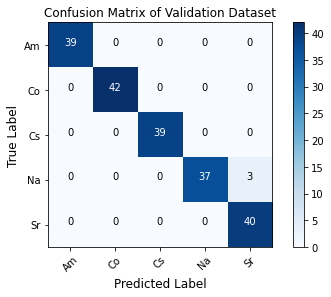

In [42]:
conf_matrix = confusion_matrix(y_true = y_val,
                               y_pred = y_val_pred)

plot_confusion_matrix(conf_matrix, knn_best_fit.classes_, title='Confusion Matrix of Validation Dataset')

In [43]:
print(classification_report(y_val, y_val_pred))

              precision    recall  f1-score   support

          Am       1.00      1.00      1.00        39
          Co       1.00      1.00      1.00        42
          Cs       1.00      1.00      1.00        39
          Na       1.00      0.93      0.96        40
          Sr       0.93      1.00      0.96        40

    accuracy                           0.98       200
   macro avg       0.99      0.98      0.98       200
weighted avg       0.99      0.98      0.98       200



## Predict Test Data

In [31]:
y_test_pred = knn_best_fit.predict(X_test_scaled)

Confusion matrix, without normalization
[[20  0  0  0  0]
 [ 0 19  0  0  1]
 [ 0  0 20  0  0]
 [ 0  0  0 19  1]
 [ 0  0  0  0 20]]


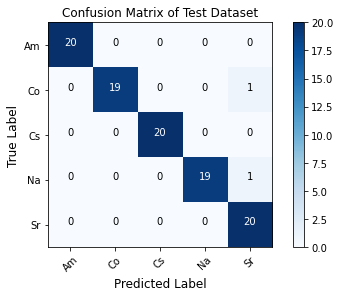

In [44]:
conf_matrix = confusion_matrix(y_true = y_test,
                               y_pred = y_test_pred)

plot_confusion_matrix(conf_matrix, knn_best_fit.classes_, title='Confusion Matrix of Test Dataset')

In [45]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

          Am       1.00      1.00      1.00        20
          Co       1.00      0.95      0.97        20
          Cs       1.00      1.00      1.00        20
          Na       1.00      0.95      0.97        20
          Sr       0.91      1.00      0.95        20

    accuracy                           0.98       100
   macro avg       0.98      0.98      0.98       100
weighted avg       0.98      0.98      0.98       100



## Using PCA to Reduce Dimension of Dataset

In [46]:
pca4 = PCA(n_components=4)
pca4.fit(X_train_scaled)

X_train_pca = pd.DataFrame(pca4.transform(X_train_scaled), 
                           columns=['PC1','PC2','PC3','PC4'],
                           index=X_train_scaled.index)
X_train_pca.head()

,PC1,PC2,PC3,PC4
228,-1.333148,-6.973065,-1.828323,-0.204546
45,5.216000,-1.538544,-2.553961,-0.119963
373,1.588990,-2.928583,3.079826,-0.518022
813,0.019257,-5.230008,-2.193108,-0.494073
448,-2.171792,-7.419241,0.575506,0.137649


In [47]:
X_val_pca = pd.DataFrame(pca4.transform(X_val_scaled), 
                           columns=['PC1','PC2','PC3','PC4'],
                           index=X_val_scaled.index)
X_val_pca.head()

,PC1,PC2,PC3,PC4
519,-2.047575,-6.605017,2.738079,0.225536
837,-0.036338,-5.403694,-2.519798,0.264188
208,-1.312760,-7.028755,-2.575681,0.117998
525,-2.163408,-6.637029,2.819115,-0.058233
978,5.495240,1.884488,1.351062,-0.910140


In [48]:
X_test_pca = pd.DataFrame(pca4.transform(X_test_scaled), 
                           columns=['PC1','PC2','PC3','PC4'],
                           index=X_test_scaled.index)
X_test_pca.head()

,PC1,PC2,PC3,PC4
0,4.256466,-2.385993,-2.460909,0.490507
1,3.383681,-3.240842,-3.318848,0.235644
2,3.327235,-3.284431,-3.738806,0.512847
3,3.519002,-2.918663,-2.048523,-0.355425
4,3.032333,-3.663244,-4.096956,0.068569


In [49]:
train_pca_df = X_train_pca.copy()
train_pca_df['Class'] = y_train.copy()
train_pca_df.head()

,PC1,PC2,PC3,PC4,Class
228,-1.333148,-6.973065,-1.828323,-0.204546,Na
45,5.216000,-1.538544,-2.553961,-0.119963,Co
373,1.588990,-2.928583,3.079826,-0.518022,Na
813,0.019257,-5.230008,-2.193108,-0.494073,Sr
448,-2.171792,-7.419241,0.575506,0.137649,Am


## Check Correlation on Each Principal Component

Scatter plot for each principal component

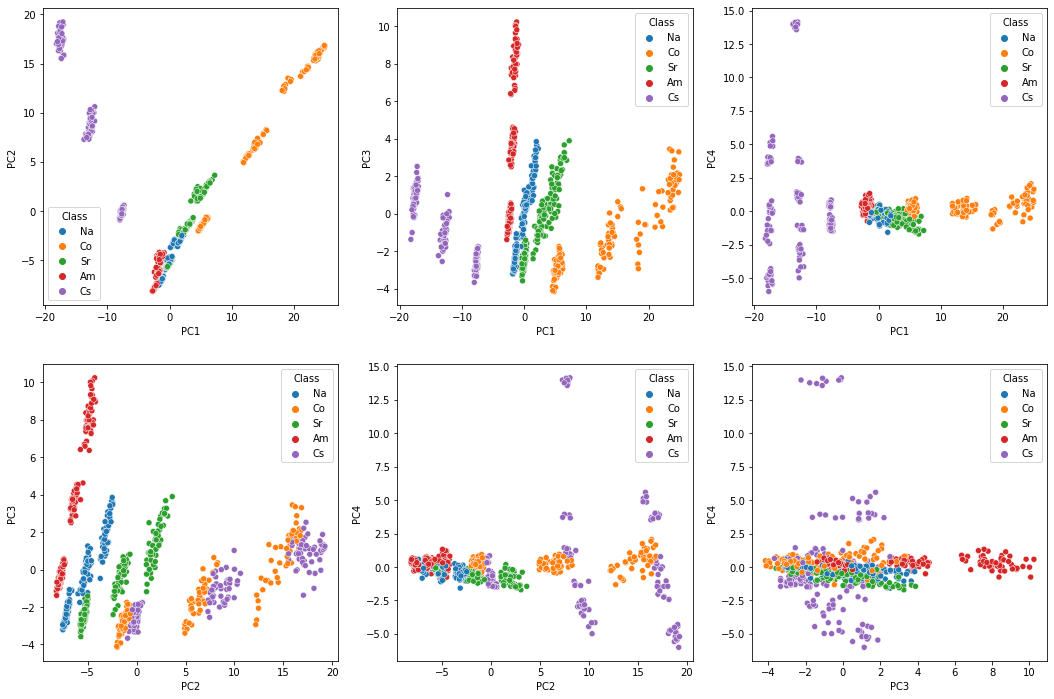

In [50]:
fig, ax = plt.subplots(2, 3, figsize=(18,12))

sns.scatterplot(x='PC1', y='PC2', hue='Class', data=train_pca_df, ax=ax[0][0])
sns.scatterplot(x='PC1', y='PC3', hue='Class', data=train_pca_df, ax=ax[0][1])
sns.scatterplot(x='PC1', y='PC4', hue='Class', data=train_pca_df, ax=ax[0][2])
sns.scatterplot(x='PC2', y='PC3', hue='Class', data=train_pca_df, ax=ax[1][0])
sns.scatterplot(x='PC2', y='PC4', hue='Class', data=train_pca_df, ax=ax[1][1])
sns.scatterplot(x='PC3', y='PC4', hue='Class', data=train_pca_df, ax=ax[1][2])

plt.show()

PC1 and PC3 can sparate data quite nice.

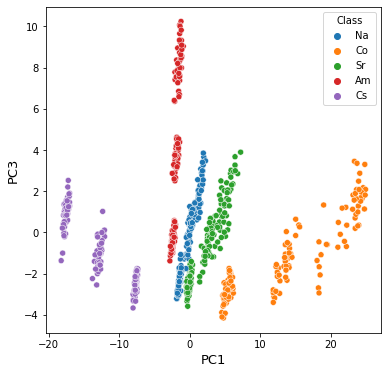

In [52]:
plt.figure(figsize=(6,6))

ax = plt.axes()

sns.scatterplot(x='PC1', y='PC3', hue='Class', data=train_pca_df, ax=ax)
ax.set_xlabel('PC1', size=13)
ax.set_ylabel('PC3', size=13)

plt.show()

## Find Best Model Using GridSearchCV on PCA Dataset

In [53]:
search_params = {"metric":["minkowski","euclidean","manhattan"], "n_neighbors":list(range(3,12,2))}

knn = KNeighborsClassifier()

knn_cv = GridSearchCV(estimator = knn,
                      param_grid = search_params,
                      cv = 5,
                      verbose=3)

knn_cv.fit(X_train_pca, y_train)

Fitting 5 folds for each of 15 candidates, totalling 75 fits
[CV 1/5] END ...metric=minkowski, n_neighbors=3;, score=1.000 total time=   0.0s
[CV 2/5] END ...metric=minkowski, n_neighbors=3;, score=1.000 total time=   0.0s
[CV 3/5] END ...metric=minkowski, n_neighbors=3;, score=1.000 total time=   0.0s
[CV 4/5] END ...metric=minkowski, n_neighbors=3;, score=1.000 total time=   0.0s
[CV 5/5] END ...metric=minkowski, n_neighbors=3;, score=1.000 total time=   0.0s
[CV 1/5] END ...metric=minkowski, n_neighbors=5;, score=1.000 total time=   0.0s
[CV 2/5] END ...metric=minkowski, n_neighbors=5;, score=1.000 total time=   0.0s
[CV 3/5] END ...metric=minkowski, n_neighbors=5;, score=1.000 total time=   0.0s
[CV 4/5] END ...metric=minkowski, n_neighbors=5;, score=1.000 total time=   0.0s
[CV 5/5] END ...metric=minkowski, n_neighbors=5;, score=1.000 total time=   0.0s
[CV 1/5] END ...metric=minkowski, n_neighbors=7;, score=1.000 total time=   0.0s
[CV 2/5] END ...metric=minkowski, n_neighbors=7;

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['minkowski', 'euclidean', 'manhattan'],
                         'n_neighbors': [3, 5, 7, 9, 11]},
             verbose=3)

In [54]:
knn_cv.best_params_

{'metric': 'minkowski', 'n_neighbors': 3}

## Create kNN Using Best Hyperparameters On PCA Data

In [55]:
knn = KNeighborsClassifier(metric=knn_cv.best_params_['metric'],
                          n_neighbors=knn_cv.best_params_['n_neighbors'])

knn.fit(X_train_pca, y_train)

KNeighborsClassifier(n_neighbors=3)

In [58]:
print(f'Score on training dataset\t: {knn.score(X_train_pca, y_train)}')

Score on training dataset	: 1.0


In [59]:
y_val_pred = knn.predict(X_val_pca)

Confusion matrix, without normalization
[[39  0  0  0  0]
 [ 0 42  0  0  0]
 [ 0  0 39  0  0]
 [ 0  0  0 40  0]
 [ 0  0  0  0 40]]


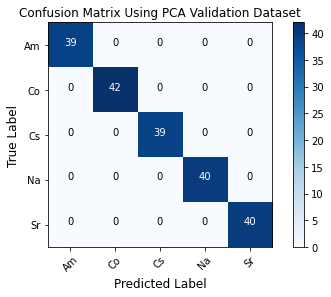

In [60]:
conf_matrix = confusion_matrix(y_val, y_val_pred)

plot_confusion_matrix(conf_matrix,
                     classes=knn.classes_,
                     title='Confusion Matrix Using PCA Validation Dataset')

In [61]:
print(classification_report(y_val, y_val_pred))

              precision    recall  f1-score   support

          Am       1.00      1.00      1.00        39
          Co       1.00      1.00      1.00        42
          Cs       1.00      1.00      1.00        39
          Na       1.00      1.00      1.00        40
          Sr       1.00      1.00      1.00        40

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



In [62]:
y_test_pred = knn.predict(X_test_pca)

Confusion matrix, without normalization
[[20  0  0  0  0]
 [ 0 19  0  0  1]
 [ 0  0 20  0  0]
 [ 0  0  0 20  0]
 [ 0  0  0  0 20]]


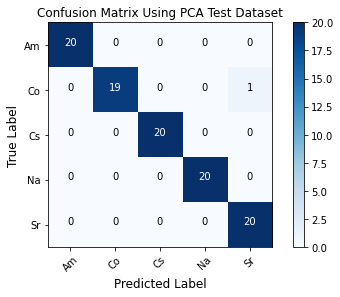

In [63]:
conf_matrix = confusion_matrix(y_test, y_test_pred)

plot_confusion_matrix(conf_matrix,
                     classes=knn.classes_,
                     title='Confusion Matrix Using PCA Test Dataset')

In [64]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

          Am       1.00      1.00      1.00        20
          Co       1.00      0.95      0.97        20
          Cs       1.00      1.00      1.00        20
          Na       1.00      1.00      1.00        20
          Sr       0.95      1.00      0.98        20

    accuracy                           0.99       100
   macro avg       0.99      0.99      0.99       100
weighted avg       0.99      0.99      0.99       100



Performance of kNN on PCA dataset is better than dataset with 256 features.